### Final Project Submission Group
- Group member 1
    - Name: Edward Day
    - Email: ED558@drexel.edu
- Group member 2
    - Name: Joshua Geller
    - Email: jg3768@drexel.edu
- Group member 3
    - Name: Kim Dineen
    - Email: kd975@drexel.edu
- Group member 4
    - Name: Arjun Naik
    - Email: an866@drexel.edu

In [12]:
import csv
import pandas as pd
import numpy as np
import datetime as dt
from pprint import pprint
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from geopy.distance import geodesic
import http.client
import json


In [13]:
df = pd.read_csv('data/COVID-19_Aggregate_Cases_Current_Daily_County_Health.csv', sep = ',')

#Open source data set comes from:
#https://data.pa.gov/Health/COVID-19-Aggregate-Cases-Current-Daily-County-Heal/j72v-r42c

#https://data.pa.gov/resource/bicw-3gwi.json JSON version of the dataset
#Dataset is now stored in a Pandas Dataframe

df.head()

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
0,Centre,03/05/2020,0,NaN,0,162385,0.0,NaN,0.0,42027,-77.825001,40.919314,POINT (-77.82500112 40.9193135)
1,Blair,06/16/2020,0,0.4,59,121829,0.0,0.4,48.4,42013,-78.349077,40.485550,POINT (-78.34907687 40.48555024)
2,Delaware,01/09/2021,298,321.3,32745,566747,52.6,56.7,5777.7,42045,-75.406277,39.916579,POINT (-75.40627712 39.91657867)
3,Sullivan,10/30/2020,0,0.3,21,6066,0.0,4.7,346.2,42113,-76.514792,41.448099,POINT (-76.5147922 41.4480994)
4,Lancaster,05/25/2020,85,56.9,3005,545724,15.6,10.4,550.6,42071,-76.251388,40.045908,POINT (-76.25138768 40.04590796)


In [14]:
import io

In [15]:
for col in df.columns:
    print(col)

Jurisdiction
Date
New Cases
7-day Average New Cases
Cumulative cases                          
Population (2019)
New Case Rate
7-Day Average New Case Rate
Cumulative Case Rate
County FIPS Code
Longitude
Latitude
Georeferenced Lat & Long


In [16]:
df.iloc[df.groupby('Jurisdiction')['New Case Rate'].agg(pd.Series.idxmax)]

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
11039,Adams,12/18/2020,184,96.6,3632,103009,178.6,93.8,3525.9,42001,-77.222243,39.872096,POINT (-77.22224271 39.87209565)
1641,Allegheny,12/10/2020,1454,952.9,38173,1216045,119.6,78.4,3139.1,42003,-79.986198,40.467355,POINT (-79.98619843 40.46735543)
26163,Armstrong,12/30/2020,93,53.4,3519,64735,143.7,82.5,5436.0,42005,-79.473169,40.815095,POINT (-79.47316899 40.81509526)
12314,Beaver,12/11/2020,299,174.9,6074,163929,182.4,106.7,3705.3,42007,-80.351074,40.683492,POINT (-80.35107356 40.68349245)
1308,Bedford,12/07/2020,128,58.7,2017,47888,267.3,122.6,4211.9,42009,-78.491165,40.007375,POINT (-78.49116474 40.00737536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10719,Washington,12/10/2020,321,161.9,6276,206865,155.2,78.2,3033.9,42125,-80.251801,40.191097,POINT (-80.25180083 40.19109663)
27436,Wayne,12/13/2020,101,52.3,1108,51361,196.6,101.8,2157.3,42127,-75.305154,41.649698,POINT (-75.3051535 41.64969805)
12372,Westmoreland,12/10/2020,748,381.6,13172,348899,214.4,109.4,3775.3,42129,-79.471341,40.310315,POINT (-79.47134118 40.310315)
5345,Wyoming,04/03/2021,28,20.7,1512,26794,104.5,77.3,5643.1,42131,-76.018130,41.518925,POINT (-76.01813003 41.51892488)


In [17]:
df.iloc[df.groupby('Jurisdiction')['New Case Rate'].agg(pd.Series.idxmax)]

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
11039,Adams,12/18/2020,184,96.6,3632,103009,178.6,93.8,3525.9,42001,-77.222243,39.872096,POINT (-77.22224271 39.87209565)
1641,Allegheny,12/10/2020,1454,952.9,38173,1216045,119.6,78.4,3139.1,42003,-79.986198,40.467355,POINT (-79.98619843 40.46735543)
26163,Armstrong,12/30/2020,93,53.4,3519,64735,143.7,82.5,5436.0,42005,-79.473169,40.815095,POINT (-79.47316899 40.81509526)
12314,Beaver,12/11/2020,299,174.9,6074,163929,182.4,106.7,3705.3,42007,-80.351074,40.683492,POINT (-80.35107356 40.68349245)
1308,Bedford,12/07/2020,128,58.7,2017,47888,267.3,122.6,4211.9,42009,-78.491165,40.007375,POINT (-78.49116474 40.00737536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10719,Washington,12/10/2020,321,161.9,6276,206865,155.2,78.2,3033.9,42125,-80.251801,40.191097,POINT (-80.25180083 40.19109663)
27436,Wayne,12/13/2020,101,52.3,1108,51361,196.6,101.8,2157.3,42127,-75.305154,41.649698,POINT (-75.3051535 41.64969805)
12372,Westmoreland,12/10/2020,748,381.6,13172,348899,214.4,109.4,3775.3,42129,-79.471341,40.310315,POINT (-79.47134118 40.310315)
5345,Wyoming,04/03/2021,28,20.7,1512,26794,104.5,77.3,5643.1,42131,-76.018130,41.518925,POINT (-76.01813003 41.51892488)


In [18]:
biggest = df.nlargest(5, 'New Cases')
biggest

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
7017,Pennsylvania,12/10/2020,12793,10165.3,473504,12801989,99.9,79.4,3698.7,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
9922,Pennsylvania,12/04/2020,12424,8584.1,414771,12801989,97.0,67.1,3239.9,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
9848,Pennsylvania,12/03/2020,12318,7930.4,402347,12801989,96.2,61.9,3142.8,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
7197,Pennsylvania,12/09/2020,12219,10097.4,460711,12801989,95.4,78.9,3598.7,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
5489,Pennsylvania,12/11/2020,11290,10003.3,484794,12801989,88.2,78.1,3786.9,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)


In [19]:
df.groupby(['Jurisdiction'], sort=False)['New Cases'].max()

Jurisdiction
Centre       223
Blair        236
Delaware     710
Sullivan      23
Lancaster    926
            ... 
Carbon       124
Armstrong     93
Jefferson     62
Bucks        698
Franklin     243
Name: New Cases, Length: 68, dtype: int64

In [20]:
idx = df.groupby(['Jurisdiction'])['New Cases'].transform(max) == df['New Cases']

In [21]:
df[idx]

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
376,Venango,12/08/2020,104,52.6,1448,50668,205.3,103.8,2857.8,42121,-79.762866,41.403413,POINT (-79.76286561 41.40341259)
432,Snyder,02/04/2021,177,36.7,2887,40372,438.4,90.9,7151.0,42109,-77.072560,40.771137,POINT (-77.07255968 40.77113737)
891,Erie,12/11/2020,301,244.4,8281,269728,111.6,90.6,3070.1,42049,-80.040759,41.994138,POINT (-80.0407591 41.99413787)
913,Clearfield,12/25/2020,118,72.0,3782,79255,148.9,90.8,4771.9,42033,-78.475583,41.000429,POINT (-78.47558343 41.000429)
1308,Bedford,12/07/2020,128,58.7,2017,47888,267.3,122.6,4211.9,42009,-78.491165,40.007375,POINT (-78.49116474 40.00737536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26658,Montour,12/16/2020,59,20.1,798,18230,323.6,110.5,4377.4,42093,-76.664705,41.028018,POINT (-76.66470527 41.02801824)
27324,Schuylkill,01/01/2021,322,149.0,8366,141359,227.8,105.4,5918.3,42107,-76.223324,40.707512,POINT (-76.22332385 40.70751243)
27436,Wayne,12/13/2020,101,52.3,1108,51361,196.6,101.8,2157.3,42127,-75.305154,41.649698,POINT (-75.3051535 41.64969805)
27462,Blair,11/19/2020,236,116.9,3133,121829,193.7,95.9,2571.6,42013,-78.349077,40.485550,POINT (-78.34907687 40.48555024)


In [22]:
df['New Cases_max'] = df.groupby(['Jurisdiction'])['New Cases'].transform(max)

df.head(11)

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long,New Cases_max
0,Centre,03/05/2020,0,NaN,0,162385,0.0,NaN,0.0,42027,-77.825001,40.919314,POINT (-77.82500112 40.9193135),223
1,Blair,06/16/2020,0,0.4,59,121829,0.0,0.4,48.4,42013,-78.349077,40.485550,POINT (-78.34907687 40.48555024),236
2,Delaware,01/09/2021,298,321.3,32745,566747,52.6,56.7,5777.7,42045,-75.406277,39.916579,POINT (-75.40627712 39.91657867),710
3,Sullivan,10/30/2020,0,0.3,21,6066,0.0,4.7,346.2,42113,-76.514792,41.448099,POINT (-76.5147922 41.4480994),23
4,Lancaster,05/25/2020,85,56.9,3005,545724,15.6,10.4,550.6,42071,-76.251388,40.045908,POINT (-76.25138768 40.04590796),926
5,Mifflin,04/08/2021,7,6.6,4883,46138,15.2,14.2,10583.5,42087,-77.620031,40.612749,POINT (-77.62003089 40.61274928),190
6,Venango,08/31/2020,0,0.1,79,50668,0.0,0.3,155.9,42121,-79.762866,41.403413,POINT (-79.76286561 41.40341259),104
7,Sullivan,10/02/2020,1,0.3,15,6066,16.5,4.7,247.3,42113,-76.514792,41.448099,POINT (-76.5147922 41.4480994),23
8,Sullivan,11/03/2020,0,0.4,23,6066,0.0,7.1,379.2,42113,-76.514792,41.448099,POINT (-76.5147922 41.4480994),23
9,Venango,08/09/2020,1,0.6,72,50668,2.0,1.1,142.1,42121,-79.762866,41.403413,POINT (-79.76286561 41.40341259),104


In [23]:
path = 'data/COVID-19_Aggregate_Cases_Current_Daily_County_Health.csv'
#grab data from csv and store in list of data
with open(path, 'r') as f:
    data = [line.strip() for line in f]
date_cases_dictionary = defaultdict(int)
data.pop(0) #first entry is not needed

#return the distance between 2 counties in miles
def get_distance(county1,county2):
  if county1 == county2:
    return 0
  else:
    return (geodesic(county1, county2).mi)

#returns the given county data by date
def get_current_county_data(county,date):
  for x in data:
    entry = x.split(",")
    jurisdiction = entry[0]
    day = entry[1]
    if jurisdiction == county and day == date:
      distance = get_distance(county,county)
      entry.append(distance)
      return entry

#returns a dataframe sorted by proximity to the given county in miles on a specified date
#dataframe contains covid data for the given county and all counties
#within the given proximity
def cases_by_proximity(county,date,proximity):
  distance_dictionary = defaultdict(list)
  current_county_data = get_current_county_data(county,date)
  current_county_lat_long = (current_county_data[11],current_county_data[10])
  distance_dictionary[county] = current_county_data
  for x in data:
    entry = x.split(",")
    jurisdiction = entry[0]
    day = entry[1]
    new_cases = entry[2]
    longitude = entry[10]
    latitude = entry[11]
    if jurisdiction != county and day == date:
      new_county_lat_long = (latitude,longitude)
      distance = get_distance(current_county_lat_long,new_county_lat_long)
      entry.append(distance)
      if distance <= proximity:
        distance_dictionary[jurisdiction] = entry
  result = pd.DataFrame(list(distance_dictionary.values()),columns = ['Jurisdiction','Date','New Cases','7-day Average New Cases','Cumulative cases','Population (2019)','New Case Rate',
                                                     '7-Day Average New Case Rate','Cumulative Case Rate','County FIPS Code','Longitude','Latitude','Georeferenced Lat & Long', 
                                                     "Proximity in miles"])
  return result.sort_values(by=['Proximity in miles'])


#loop through each entry and generate the number of cases per day
for x in data:
  entry = x.split(",")
  date = entry[1]
  new_cases = entry[2]
  if date not in date_cases_dictionary:
    date_cases_dictionary[date] = 0
  else:
    date_cases_dictionary[date] += int(new_cases)

total_cases = 0
for value in date_cases_dictionary.values():
  total_cases += int(value)

#print out each days number of cases
pprint(date_cases_dictionary)
#print out the total number of cases over how many days
pprint("Total Cases in Pennslyvania in this dataset over "+str(len(date_cases_dictionary.keys()))+" days: "+str(total_cases))

prox = cases_by_proximity("Allegheny","11/12/2020",50)

prox.head(11)

defaultdict(<class 'int'>,
            {'01/01/2021': 15758,
             '01/02/2021': 9263,
             '01/03/2021': 7236,
             '01/04/2021': 17374,
             '01/05/2021': 19732,
             '01/06/2021': 18185,
             '01/07/2021': 21051,
             '01/08/2021': 19289,
             '01/09/2021': 14318,
             '01/10/2021': 10468,
             '01/11/2021': 15111,
             '01/12/2021': 16238,
             '01/13/2021': 12893,
             '01/14/2021': 13464,
             '01/15/2021': 13663,
             '01/16/2021': 11564,
             '01/17/2021': 7950,
             '01/18/2021': 11184,
             '01/19/2021': 11170,
             '01/20/2021': 11519,
             '01/21/2021': 10299,
             '01/22/2021': 11574,
             '01/23/2021': 7621,
             '01/24/2021': 7580,
             '01/25/2021': 10172,
             '01/26/2021': 11109,
             '01/27/2021': 13968,
             '01/28/2021': 16716,
             '01/29/2021':

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long,Proximity in miles
0,Allegheny,11/12/2020,386,326.7,19143,1216045,31.7,26.9,1574.2,42003,-79.98619843,40.46735543,POINT (-79.98619843 40.46735543),0.000000
9,Washington,11/12/2020,91,66.7,2877,206865,44,32.3,1390.8,42125,-80.25180083,40.19109663,POINT (-80.25180083 40.19109663),23.665102
4,Beaver,11/12/2020,59,43,2771,163929,36,26.2,1690.4,42007,-80.35107356,40.68349245,POINT (-80.35107356 40.68349245),24.309413
3,Westmoreland,11/12/2020,149,125.6,5815,348899,42.7,36,1666.7,42129,-79.47134118,40.310315,POINT (-79.47134118 40.310315),29.244752
6,Butler,11/12/2020,68,90.1,2759,187853,36.2,48,1468.7,42019,-79.91711779,40.91083185,POINT (-79.91711779 40.91083185),30.815105
5,Armstrong,11/12/2020,56,36.1,1159,64735,86.5,55.8,1790.4,42005,-79.47316899,40.81509526,POINT (-79.47316899 40.81509526),36.095366
1,Lawrence,11/12/2020,34,44.4,1485,85512,39.8,52,1736.6,42073,-80.33754114,40.99325035,POINT (-80.33754114 40.99325035),40.705560
7,Fayette,11/12/2020,28,20.4,1310,129274,21.7,15.8,1013.4,42051,-79.65189635,39.9194478,POINT (-79.65189635 39.9194478),41.736926
2,Greene,11/12/2020,17,13.1,415,36233,46.9,36.3,1145.4,42059,-80.22943817,39.85480393,POINT (-80.22943817 39.85480393),44.181289
8,Indiana,11/12/2020,52,41.6,1697,84073,61.9,49.4,2018.5,42063,-79.09333493,40.65295497,POINT (-79.09333493 40.65295497),48.700789


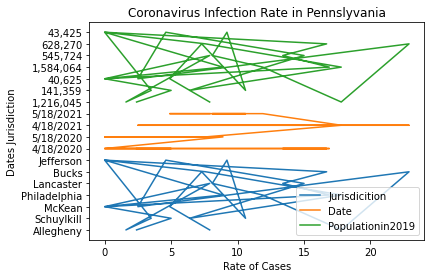

In [55]:
data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

nwcsrate = data['New Case Rate']

Countycount = data['Jurisdiction']
date = data['Date']
new = data['New Cases']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(nwcsrate, Countycount, label="Jurisdicition")
plt.plot(nwcsrate, date, label="Date")
plt.plot(nwcsrate, pop2019, label="Populationin2019")

plt.legend()
plt.title('Coronavirus Infection Rate in Pennslyvania')
plt.ylabel('Dates Jurisdiction')
plt.xlabel('Rate of Cases')

plt.savefig('plot.png')

plt.show()



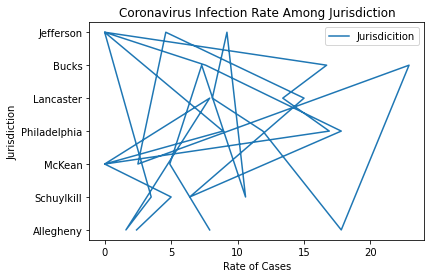

In [47]:

data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

nwcsrate = data['New Case Rate']

Countycount = data['Jurisdiction']
date = data['Date']
new = data['New Cases']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(nwcsrate, Countycount, label="Jurisdicition")

plt.legend()
plt.title('Coronavirus Infection Rate Among Jurisdiction')
plt.ylabel('Jurisdiction')
plt.xlabel('Rate of Cases')

plt.savefig('plot.png')

plt.show()

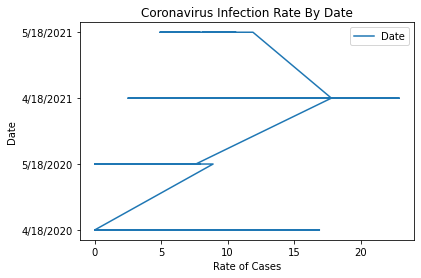

In [57]:

data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

nwcsrate = data['New Case Rate']

Countycount = data['Jurisdiction']
date = data['Date']
new = data['New Cases']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(nwcsrate, date, label="Date")

plt.legend()
plt.title('Coronavirus Infection Rate By Date')
plt.ylabel('Date')
plt.xlabel('Rate of Cases')

plt.savefig('plot.png')

plt.show()

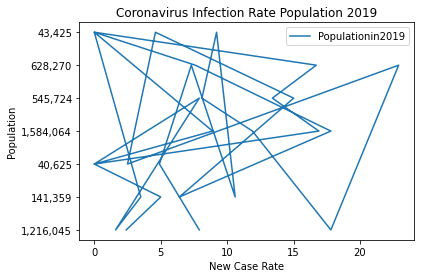

In [58]:

data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

nwcsrate = data['New Case Rate']

Countycount = data['Jurisdiction']
date = data['Date']
new = data['New Cases']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(nwcsrate, pop2019, label="Populationin2019")

plt.legend()
plt.title('Coronavirus Infection Rate Population 2019')
plt.ylabel('Population')
plt.xlabel('New Case Rate')

plt.savefig('plot.png')

plt.show()

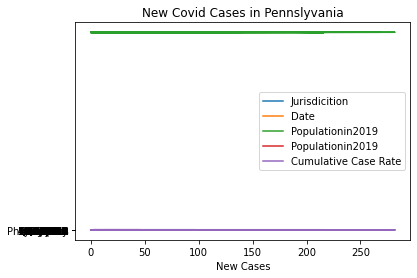

In [59]:


data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

new = data['New Cases']


Countycount = data['Jurisdiction']
date = data['Date']
nwcsrate = data['New Case Rate']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(new, Countycount, label="Jurisdicition")
plt.plot(new, date, label="Date")
plt.plot(new, fips, pop2019, label="Populationin2019")
plt.plot(new, totalcsrate, label="Cumulative Case Rate")

plt.legend()
plt.title('New Covid Cases in Pennslyvania')
plt.ylabel('')
plt.xlabel('New Cases')

plt.savefig('plot.png')

plt.show()


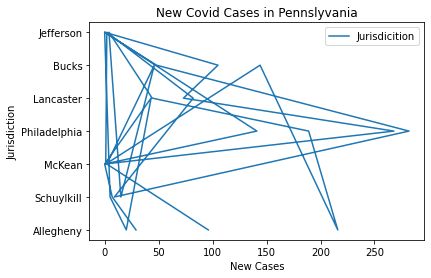

In [60]:

data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

new = data['New Cases']


Countycount = data['Jurisdiction']
date = data['Date']
nwcsrate = data['New Case Rate']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(new, Countycount, label="Jurisdicition")


plt.legend()
plt.title('New Covid Cases in Pennslyvania')
plt.ylabel('Jurisdiction')
plt.xlabel('New Cases')

plt.savefig('plot.png')

plt.show()

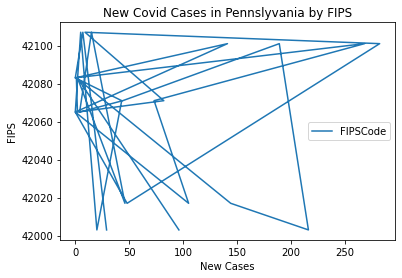

In [52]:

data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

new = data['New Cases']


Countycount = data['Jurisdiction']
date = data['Date']
nwcsrate = data['New Case Rate']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(new, fips, label="FIPSCode")


plt.legend()
plt.title('New Covid Cases in Pennslyvania by FIPS')
plt.ylabel('FIPS')
plt.xlabel('New Cases')

plt.savefig('plot.png')

plt.show()

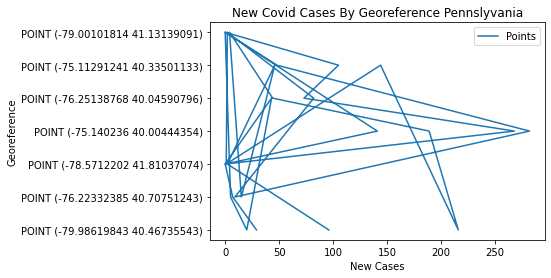

In [53]:


data = pd.read_csv('./data/Selected COVID Data AprilMay .csv')

new = data['New Cases']


Countycount = data['Jurisdiction']
date = data['Date']
nwcsrate = data['New Case Rate']
average = data['7-day Average New Cases']
pop2019 = data['Population (2019)']
sevendynwcsrate = data['7-Day Average New Case Rate']
totalcsrate = data['Cumulative Case Rate']
fips = data['County FIPS Code']
Lat = data['Longitude']
Long = data['Latitude']
Georefll = data['Georeferenced Lat & Long']

plt.plot(new, Georefll, label="Points")


plt.legend()
plt.title('New Covid Cases By Georeference Pennslyvania')
plt.ylabel('Georeference')
plt.xlabel('New Cases')

plt.savefig('plot.png')

plt.show()

In [ ]:
Area = df['Jurisdiction']
Covidcases = df['New Cases']
nwcsrate = df['New Case Rate']
pop2019 = df['Population (2019)']

seven = df['7-day Average New Cases']

badcases = pd.DataFrame( Area,Covidcases)

when = pd.to_datetime(df['Date'])

badcases['Dates'] = when
badcases['7-day Average New Cases'] = seven
badcases['New Case Rate'] = nwcsrate
badcases['Population (2019)'] = pop2019
badcases.dropna(inplace=True)
badcases.head(55)


In [ ]:
df.iloc[df.groupby('Jurisdiction')['New Case Rate'].agg(pd.Series.idxmax)]

In [ ]:
df.iloc[df.groupby('Jurisdiction')['New Cases'].agg(pd.Series.idxmax)]

In [ ]:
df.groupby(['Jurisdiction', 'New Cases']).size().sort_values()

In [ ]:
df.groupby(['Jurisdiction', 'New Cases']).size().sort_values(ascending=False)

In [ ]:
df.groupby(['County FIPS Code', 'New Cases']).size().sort_values()

In [ ]:
df.groupby(['County FIPS Code', 'New Cases']).size().sort_values(ascending=False)

In [ ]:
conn = http.client.HTTPSConnection("data.pa.gov")
 
conn.request("GET", "https://data.pa.gov/resource/bicw-3gwi.json")
 
res = conn.getresponse()
data = res.read()
 
#print(data.decode("utf-8"))
data = data.decode("utf8")
 
data = json.loads(data)
data

In [ ]:
#get total partially vaccinated
newdict={}
for i in data:
    county = (i['county'])
    if 'partiallycovered' in i:
        if county not in newdict:
            newdict.update({county : int(i['partiallycovered'])})
        else:
            newdict[county] += int(i['partiallycovered'])
for key,value in newdict.items():
    print("{}: {} people partially vaccinated".format(key,value))

In [ ]:
#get total vaccinated
newdict={}
for i in data:
    county = (i['county'])
    if 'fullycovered' in i:
        if county not in newdict:
            newdict.update({county : int(i['fullycovered'])})
        else:
            newdict[county] += int(i['fullycovered'])
for key,value in newdict.items():
    print("{}: {} people fully vaccinated".format(key,value))

In [ ]:
stats=[]
for i in data:
    temp={}
    county = (i['county'])
    temp['county']=county
    date = (i['date'])
    year = date[0:4]
    month = date[5:7]
    day = date[8:10]
    newdate = (month + '-' + year)
    temp['date'] = newdate
    if 'partiallycovered' in i:
        temp['partiallycovered'] = int(i['partiallycovered'])
    else:
        temp['partiallycovered'] = 0
    if 'fullycovered' in i:
        temp['fullycovered'] = int(i['fullycovered'])
    else:
        temp['fullycovered'] = 0
    stats.append(temp)


df = pd.DataFrame(stats)
df.head(11)

In [ ]:
#get the most partially vaccinated
newdict={}
newlist=[]
for i in data:
    county = (i['county'])
    if 'partiallycovered' in i:
        if county not in newdict:
            newdict.update({county : int(i['partiallycovered'])})
        else:
            newdict[county] += int(i['partiallycovered'])
for key,value in newdict.items():
    newlist.append(value)
for key,value in newdict.items():
    if value == max(newlist):
        print("{} county has the most partially vaccinated with {} people partially vaccinated".format(key,value))
    if value == min(newlist):
        print("{} county has the least partially vaccinated with {} people partially vaccinated".format(key,value))

In [ ]:
#got the most fully vaccinated
newdict={}
newlist=[]
for i in data:
    county = (i['county'])
    if 'fullycovered' in i:
        if county not in newdict:
            newdict.update({county : int(i['fullycovered'])})
        else:
            newdict[county] += int(i['fullycovered'])
for key,value in newdict.items():
    newlist.append(value)
for key,value in newdict.items():
    if value == max(newlist):
        print("{} county has the most people fully vaccinated with {} people vaccinated".format(key,value))
    if value == min(newlist):
        print("{} county has the least people fully vaccinated with {} people vaccinated".format(key,value))